In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [2]:
df=pd.read_csv('D:/Data Science/Symbiosis/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [7]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size = 0.2,random_state=0)

In [8]:
from sklearn.svm import SVC
model=SVC(kernel="linear",C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

#from sklearn.svm import SVC
#model=SVC(kernel="rbf",C=1)
#model.fit(xtrain,ytrain)
#ypred=model.predict(xtest)

#model=SVC(kernel="polynomial",C=1)
#model.fit(xtrain,ytrain)
#ypred=model.predict(xtest)

Accuracy of model is: 0.8181818181818182


<AxesSubplot:>

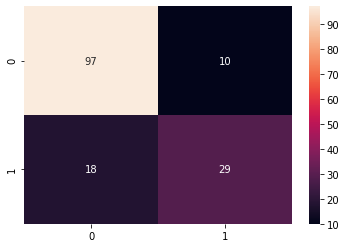

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy of model is:",acc)
sns.heatmap(cm,annot=True)

In [10]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [ ]:
#tunning of svn hyper parameter
#model
model=SVC()

#parameter
kernel=["linear","poly","rbf","sigmoid"]
C=[100,50,10,1,0.1,0.01]
gamma=["scale","auto"]

#grid
grid={"kernel":kernel,"C":C,"gamma":gamma}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")

#result
res=grid_cv.fit(xtrain,ytrain)

In [ ]:
res.best_params_

In [ ]:
res.best_score_